<a href="https://colab.research.google.com/github/WHU-Peter/COMP6247-Reinforcement-and-Online-Learning/blob/main/Final_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
from six.moves import urllib
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import scale
import math
from matplotlib.pyplot import MultipleLocator

In [ ]:
DOWNLOAD_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
DATA_PATH = "datasets/ENB"

if not os.path.isdir(DATA_PATH):
    os.makedirs(DATA_PATH)

file_path = os.path.join(DATA_PATH, "ENB2012_data.xlsx")

if not os.path.isfile(file_path):
    urllib.request.urlretrieve(DOWNLOAD_URL, file_path)
    
dataset = pd.read_excel(file_path)

In [ ]:
dataset = dataset.drop('Y2',axis=1)
print(dataset)

       X1     X2     X3      X4   X5  X6   X7  X8     Y1
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84
..    ...    ...    ...     ...  ...  ..  ...  ..    ...
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5  17.88
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5  16.54
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5  16.44
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5  16.48
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5  16.64

[768 rows x 9 columns]


(768, 9) (768, 1)
81.3929838115778 82.60524371944022


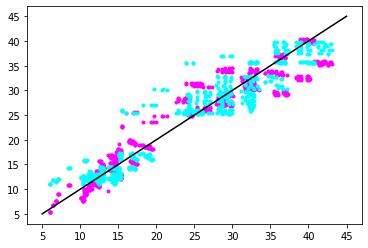

In [ ]:
rawData = dataset.values# Dataset of your chice
N, pp1 = rawData.shape
# Last column is target
X = np.matrix(rawData[:,0:pp1-1])
X_scaled = scale(X)
bias = np.ones(N)
X_scaled = np.c_[X_scaled, bias]
y = np.matrix(rawData[:,pp1-1]).T
print(X_scaled.shape, y.shape)
# Solve linear regression, plot target and prediction
w = (np.linalg.inv(X_scaled.T @ X_scaled)) @ X_scaled.T * y
yh_lin = X_scaled@w
plt.plot(y, yh_lin, '.', Color='magenta')
# J = 20basis functions obtained by k-means clustering
# sigma set to standard deviation of entire data

J = 20;
kmeans = KMeans(n_clusters=J, random_state=0).fit(X)
sig = np.std(X)
# Construct design matrix
U = np.zeros((N,J))
for i in range(N):
    for j in range(J):
       U[i][j] = np.linalg.norm(X[i] - kmeans.cluster_centers_[j])
# Solve RBF model, predict and plot
w = np.dot((np.linalg.inv(np.dot(U.T,U))), U.T) * y
yh_rbf = np.dot(U,w)
plt.plot(y, yh_rbf, '.', Color='cyan')
plt.plot([5,45], [5,45], '-', c='black')
print(np.linalg.norm(y-yh_lin), np.linalg.norm(y-yh_rbf))

In [ ]:
w_lin = np.random.randn(9, 1)
epochs = 1000
batch_num = 10
learn_rate = 0.01

Loss_lin = np.zeros(epochs)
for n in range(epochs):
  x_index = np.random.randint(0, len(y), batch_num)
  gradient =  X_scaled[x_index].T.dot(X_scaled[x_index].dot(w_lin) - y[x_index]) * 2 / batch_num
  w_lin  = w_lin -  learn_rate * gradient
  Loss_lin[n] = np.linalg.norm(X_scaled@w_lin - y)

In [ ]:
w_rbf = np.random.normal(loc=0, scale=0.1, size=J).reshape(-1, 1)
epochs = 5000
batch_num = 100
learn_rate = 0.000001

Loss_rbf = []
for n in range(epochs):
  u_index = np.random.randint(0, len(y), batch_num)
  gradient =  U[u_index].T.dot(U[u_index].dot(w_rbf) - y[u_index]) * 2 / batch_num
  w_rbf  = w_rbf - learn_rate * gradient
  if n%5 == 0:
    Loss_rbf.append(np.linalg.norm(U@w_rbf - y))

82.67802011359247 100.70210179352127


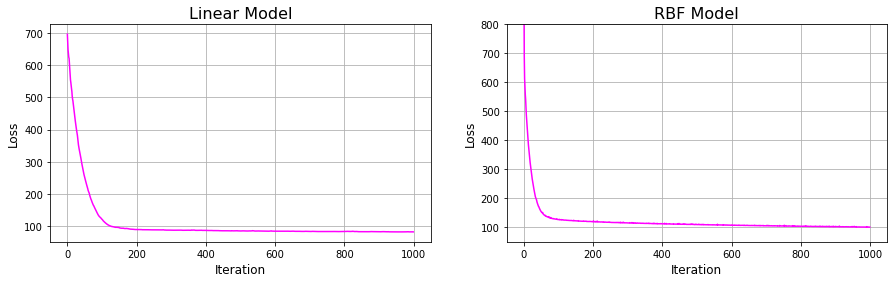

In [ ]:
print(Loss_lin[-1], Loss_rbf[-1])

y_major_locator=MultipleLocator(100)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15,4))
ax[0].plot(Loss_lin, Color='magenta')
ax[0].set_xlabel("Iteration", fontsize=12)
ax[0].set_ylabel("Loss", fontsize=12)
ax[0].set_title("Linear Model", fontsize=16)
ax[0].grid()
ax[0].yaxis.set_major_locator(y_major_locator)
ax[1].plot(Loss_rbf, Color='magenta')
ax[1].set_xlabel("Iteration", fontsize=12)
ax[1].set_ylabel("Loss", fontsize=12)
ax[1].set_title("RBF Model", fontsize=16)
ax[1].grid()
ax[1].yaxis.set_major_locator(y_major_locator)
plt.ylim(50,800)
plt.show()